<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch computer vision

## 0. Computer vision libaries in PyTorch
Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

In [86]:
import torch
from torch import nn
#Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import datasets
#IMport matplotlib for visualization
import matplotlib.pyplot as plt

#1. Getting a datasets

In [87]:
# Setup traning data

train_data = datasets.FashionMNIST(
    root="data", # Whear to download data to
    train=True, # do we want the traning datasets
    download=True, #download (bool, optional): If True, downloads the dataset from the internet and
        #puts it in root directory. If dataset is already downloaded, it is not
        #downloaded again.
    transform=torchvision.transforms.ToTensor(), # A function/tranformation we want to apply to the data
    target_transform=None #arget_transform (callable, optional): A function/transform that takes in the target and transforms it.


)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [88]:
len(train_data), len(test_data)

(60000, 10000)

In [89]:
# see the first traning example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [90]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [91]:
class_to_idx = train_data.class_to_idx
class_to_idx # Give a dict

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [92]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [93]:
#Check the shape of our image
print(f"image shape: {image.shape} -> [Colorchannels, Hight, width]") # =color channels# 0-225 0->dark colore 255-> white between 0 and 255 gray
print(f"Image lables: {label}")

image shape: torch.Size([1, 28, 28]) -> [Colorchannels, Hight, width]
Image lables: 9


### 1.2 Visualize our data

images : torch.Size([1, 28, 28]) 
 lables : 9


Text(0.5, 1.0, '9')

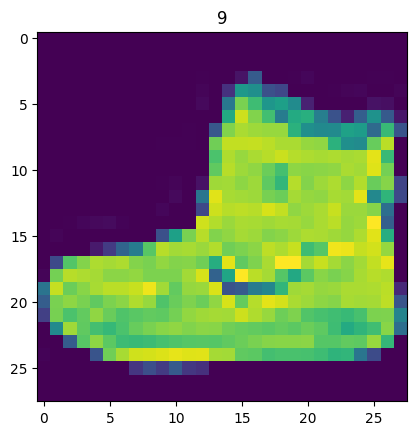

In [94]:
import matplotlib.pyplot as plt
image, lables = train_data[0]
print(f"images : {image.shape} \n lables : {lables}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

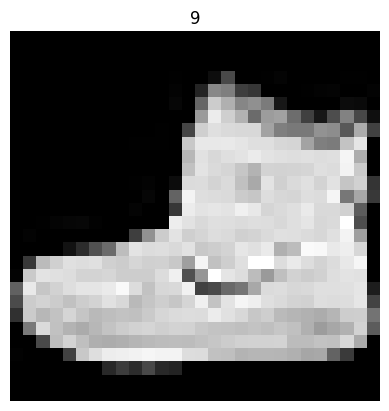

In [95]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis("off") # or False

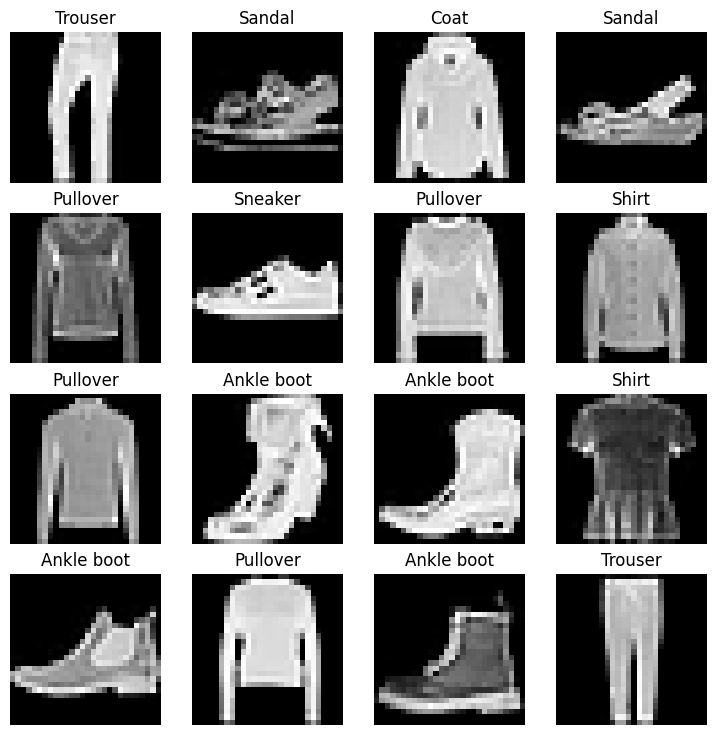

In [96]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[rand_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do Ypu think these items of (clothing) could be modelled with pure linear lines ? or do you think we'll need

In [97]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##2. Prepare data

In [98]:
from torch.utils.data import DataLoader
#Setup the batch size Hyperparameter
BATCH_SIZE = 32
#Turen datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # mix data same randmly the goal is to prevent the model from over relying on a specfic order and improve its preformance
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # test all data into same order
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7a2ced1c10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f79ba723770>)

In [99]:
#Let's check out what what we've created
print(f"DataLOader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}")
print(f"DataLOader: {test_dataloader}\nLength: {len(test_dataloader)}\nType: {type(test_dataloader)}")

DataLOader: <torch.utils.data.dataloader.DataLoader object at 0x7f7a2ced1c10>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
DataLOader: <torch.utils.data.dataloader.DataLoader object at 0x7f79ba723770>
Length: 313
Type: <class 'torch.utils.data.dataloader.DataLoader'>


In [100]:
train_features_batch ,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Class: Coat
Lables: 4, label shape: torch.Size([])
features shape: torch.Size([1, 28, 28])


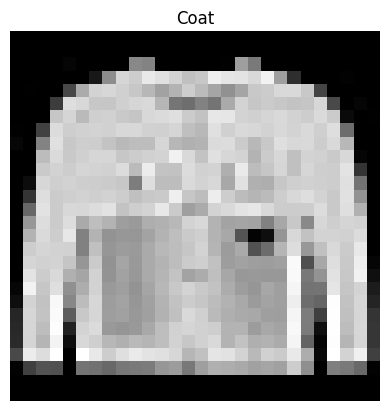

In [101]:
#Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() # random index
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Class: {class_names[label]}")
print(f"Lables: {label}, label shape: {label.shape}")
print(f"features shape: {img.shape}")

##3. Model 0: Build a baseline model
When starting to build a series of machine learning modeling experiment , it's best practice
to start with a baseline model.and
ABaseline a simple model you will try and improveupon with subsequent model/experiment
In other words start simply and add complexity when necessory

In [102]:
# Create a flatter layer
flatter_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# Flatten the sample
output = flatter_model(x) #Form forward pass

#Print out what happen
print(f"Shape before flattening: {x.shape} -> [Color_channels, height, width]\nShape after flattening: {output.shape}->[color_channels, height*width]")
#

Shape before flattening: torch.Size([1, 28, 28]) -> [Color_channels, height, width]
Shape after flattening: torch.Size([1, 784])->[color_channels, height*width]


In [103]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [104]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [105]:
torch.manual_seed(42)

#set model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, #this is 28*28
  hidden_units=10,# how many units in the hiden layer
    output_shape=len(class_names) # one for every class
).to(device) # Moved model_0 to the device (cuda in this case)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [106]:
# dummy_x = torch.rand([1, 1, 28, 28])
# s = model_0(dummy_x)
# s.shape


In [107]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [108]:
#But some times Protection and restrection They both look the same

In [109]:
# Calculate accuracy (a classification metric)
# def accuracy_fn(y_true, y_pred):
#     correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
#     acc = (correct / len(y_pred)) * 100
#     return acc

In [110]:
import requests
from pathlib import Path
#Download the helper Function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [111]:
#Imort the accurasy metric from helper function.py
from helper_functions import accuracy_fn
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)
#

## 3. Creating a function to time and experiment
ML is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc).
2. How fast it runs

In [112]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Print difference btween start time and end time """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [113]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.548100002921274e-05

###Creating a traning loop and traning a model on batches of data
1. Loop throung the epoch
2. Loop throung the training batches
3. Loop through testing batch_norm_gather_stats
4. Print out what's happening
5. Time it all(for fun)

In [114]:
# Import tqdm for progressbar
from tqdm.auto import tqdm
#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
#set the number of epoch (we'll keep this small for faster traning time)
epochs = 3
#Create traning and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  ###Traning
  train_loss = 0
  # Add a loop to loop throung the traning batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # Move data to target device
    X, y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y)

    train_loss += loss # accumulate train loss

    #3. OPtimize the zero grade
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimize the step
    optimizer.step()

  #Print out what's hapening
  if batch % 400 == 0:
    print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  #Divide total train loss by length of train dataloder
  train_loss /= len(train_dataloader)
  #print out the total loss
  print(f"Train loss: {train_loss:.5f}")

  ##Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Move data to target device
      X_test, y_test = X_test.to(device), y_test.to(device)
      #Forward pass
      test_pred = model_0(X_test)

      #2.  Calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,
                               y_pred=test_pred.argmax(dim=1))

    #4. Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Calculate the test acc average per batch

    test_acc /= len(test_dataloader)

    #print out what's happening

    print(f"Test loss: {test_loss:.5f}")
    print(f"Test acc: {test_acc:.5f}")
    print(f"Epoch: {epoch}\n--------")
    print(f"Train loss: {train_loss:.5f}")
# Calculate traning time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59039
Test loss: 0.50954
Test acc: 82.03874
Epoch: 0
--------
Train loss: 0.59039
Epoch: 1
--------
Train loss: 0.47633
Test loss: 0.47989
Test acc: 83.19688
Epoch: 1
--------
Train loss: 0.47633
Epoch: 2
--------
Train loss: 0.45503
Test loss: 0.47664
Test acc: 83.42652
Epoch: 2
--------
Train loss: 0.45503
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       device='cuda:0', requires_grad=True): 31.666 seconds


##4. Make predection and get model_0 results

In [115]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """"Returns a dictnory contaning the results of model oredecting on data_loder"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Make device agnostic code
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      #Accumulate the loss and accuracy valu per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale the losss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only work when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc}

In [116]:
model_0_result = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn
                              )
model_0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

#5. Setup device agnostic code (for using gpu if their is one)

In [117]:
!nvidia-smi

Sat Jan 10 21:27:10 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             28W /   70W |     186MiB /  15360MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [118]:
#Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1: Buiding a better model with non-linearity(non-stright line)


In [119]:
# Create a model with non-liner and linear-layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
               ):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(), #change to one vector
          nn.Linear(in_features=input_shape,
                    out_features=hidden_units),
          nn.ReLU(), #Activation function - values to 0 (to uderstand the patterns of the image imrove the modeland faster)
          nn.Linear(in_features=hidden_units,
                    out_features=output_shape),
          nn.ReLU()
      )
  def forward(self, x):
    return self.layer_stack(x)



In [120]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [121]:
#Create an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# 6.1 Setup loss, optimizer and avaluation model

In [122]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()# Measure how rong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model' s parameters to reduce the loss
                            lr=0.1)

### 6.2 functionizeing traning aand evaluation/testing loops
Let' s Create a function for:


1.   Traning loop - train_step()
2.   Testing Loop = test_step()



In [123]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """ Performs a traning with model traying to learn on data_loader """
  train_loss, train_acc = 0, 0
  #Put data into traning mode
  model.train()

  #Add a loop to loop through the traning batches
  for batch, (X,y) in enumerate(data_loader):

    #Put data into target device
    X, y = X.to(device), y.to(device)

    #1. Forward Pass (outputs the row logits from the model)

    y_pred = model(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #(go logits->predicytion lables)
    #Optimize the zero grade
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    # Optimixe the step (update the model' s parameters once *per batch)
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")



In [124]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
              """ Performs a testing with model traying to learn on data_loader """
              # test_loss, test_acc = 0, 0
              loss, acc = 0, 0
              model.eval()
              #Turn on inference mode context manager
              with torch.inference_mode():
                for X, y in data_loader:
                  #Data to the target device
                  X, y = X.to(device), y.to(device)
                  #Forward pass (output raw logits)
                  test_pred = model(X)
                  #calculate the loss
                  loss += loss_fn(test_pred, y)
                  acc += accuracy_fn(y_true=y,
                                     y_pred=test_pred.argmax(dim=1)) # go from logits-> predection lables
                # Ad
                loss /= len(data_loader)
                acc /= len(data_loader)
              print(f"Test loss: {loss:.5f} | Test acc: {acc:.2f}")

In [125]:
torch.manual_seed(42)

#Measur time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set epoch
epochs = 3

# CReate a optimization and evaluation loop using train_step() and step_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 1.09199 | Train acc: 61.34333
Test loss: 0.95636 | Test acc: 65.00
Epoch: 1
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.78101 | Train acc: 71.92833
Test loss: 0.72227 | Test acc: 73.91
Epoch: 2
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.67027 | Train acc: 75.93667
Test loss: 0.68500 | Test acc: 75.02
Train time on cuda: 29.727 seconds


In [126]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [127]:
total_train_time_model_0

31.665918581000028

#Compute faster see hear: https://horace.io/brrr_intro.html

In [128]:
#Get model_1 result dict
model_1_result = eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_1_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [129]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

#Model 2: Building a Convolutional Neural Network

In [130]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicate the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shapes: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential( #2d 2dimensional data
        nn.Conv2d(in_channels=input_shapes,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #Values we can set ourselves in our NN' sare called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    ) #first layer  feature extractors trying to learn the patterns that best repersent our data
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )#final layer take those features and classify them into our target classes what our model thinks suits our features
    self.classifire = nn.Sequential(
        nn.Flatten(), #into a single feature vector
        nn.Linear(in_features=hidden_units*7*7, # thear' s atrick to calculating this
                  out_features=output_shape)
    )
  def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Out put shape of conv Block 1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Out put shape of conv Block 2: {x.shape}")
        x = self.classifire(x)
        #print(f"Out put shape of Classifier: {x.shape}")
        return x


In [131]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shapes=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifire): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [132]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

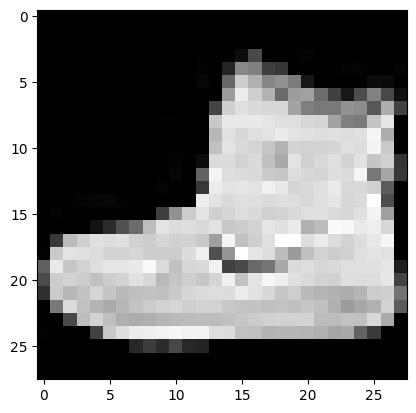

In [133]:
plt.imshow(image.squeeze(), cmap="gray")

In [134]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [135]:
#model_2.state_dict()

In [136]:
10*7*7

490

In [137]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

#7.1 Stepping through nn.Conc2d

In [138]:
torch.manual_seed(42)

# Create a batch of images
image = torch.randn(size=(32, 3, 64, 64))
test_image = image[0]

print(f"Image batch shape: {image.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f":Test image {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
:Test image tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
    

In [139]:
torch.manual_seed(42)
from torch.nn.modules import padding
#Crteate a single conv2d layer
conv_2d = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=(3, 3),#also called a filter oves pixel by pixel weights times the input 3 X 3 kernals
                   stride=1, #skip some pixels
                   padding=0)
#pass the data through the conv layer
conv_output = conv_2d(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [140]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

#### 7.2 Steping through `nn.MaxPool2d()

In [141]:
test_image.shape

torch.Size([3, 64, 64])

In [142]:
#Print out the orginal image without unsqeezed dimension
print(f"Original image shape: {test_image.shape}")
print(f"Test image with unsqeexe dimension: {test_image.unsqueeze(0).shape}")


#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) #result a 2X2 kernal matrix and output a single value max(2x2) = [out]

#pass data throug just the conv_layer
test_image_through_conv = conv_2d(test_image.unsqueeze(dim=0))
print(f"Test image through conv layer: {test_image_through_conv.shape}")

#pass data through max pool layer

test_image_through_conv_and_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after passing through conv2d_layer() and  max pool layer(): {test_image_through_conv_and_pool.shape}")


Original image shape: torch.Size([3, 64, 64])
Test image with unsqeexe dimension: torch.Size([1, 3, 64, 64])
Test image through conv layer: torch.Size([1, 10, 62, 62])
Shape after passing through conv2d_layer() and  max pool layer(): torch.Size([1, 10, 31, 31])


#Note = intaligent is compression compress our out put into a features vector features extraction(kernal)
#compress them into a feature vector in mac=xpool 2x2 int take max valu and compress them into a feature vector
#simple higher dimensional space into a smaller vector  space(dimensanality of tensor)

In [143]:
torch.manual_seed(42)
#Create a random tensor with a similer number of dimensions to our images
random_tensor = torch.randn(size=[1, 1, 2, 2])
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor Shape: {random_tensor.shape}")
#Create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the randm tensor throug the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor Shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor Shape: torch.Size([1, 1, 2, 2])

Max Pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor Shape: torch.Size([1, 1, 1, 1])


#THe conv layer learn those features ->>>> We pass them through ReLU()
#--->>>> When pass those Learn features to maxPool layer(compress them even further= Maxpool layer realy compress them) --->

### 7.3 Setup a loss function and optimizer

In [144]:
# Setup loss function/eval metrix/opotimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


###7.4 Traning and testing model_2 using our TRaning and testing Functions


In [145]:
from tqdm import tqdm
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.59475 | Train acc: 78.44167


 33%|███▎      | 1/3 [00:12<00:25, 12.85s/it]

Test loss: 0.40305 | Test acc: 85.73
Epoch: 1
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.36023 | Train acc: 87.02500


 67%|██████▋   | 2/3 [00:24<00:12, 12.16s/it]

Test loss: 0.34722 | Test acc: 87.13
Epoch: 2
-----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.32248 | Train acc: 88.34667


100%|██████████| 3/3 [00:36<00:00, 12.07s/it]

Test loss: 0.32291 | Test acc: 88.18
Train time on cuda: 36.228 seconds


In [146]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

100%|██████████| 313/313 [00:01<00:00, 270.82it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3229142725467682,
 'model_acc': 88.17891373801918}

In [147]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [148]:
import pandas as pd
compare_results = pd.DataFrame(model_0_result,
                               model_1_result,
                               model_2_results)
compare_results

,model_name,model_loss,model_acc
model_name,FashionMNISTModelV0,0.476639,83.426518
model_loss,FashionMNISTModelV0,0.476639,83.426518
model_acc,FashionMNISTModelV0,0.476639,83.426518


In [149]:
#Addd traning time to results comparison
compare_results["traning_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,traning_time
model_name,FashionMNISTModelV0,0.476639,83.426518,31.665919
model_loss,FashionMNISTModelV0,0.476639,83.426518,29.727466
model_acc,FashionMNISTModelV0,0.476639,83.426518,36.228357


Text(0, 0.5, 'Model Name')

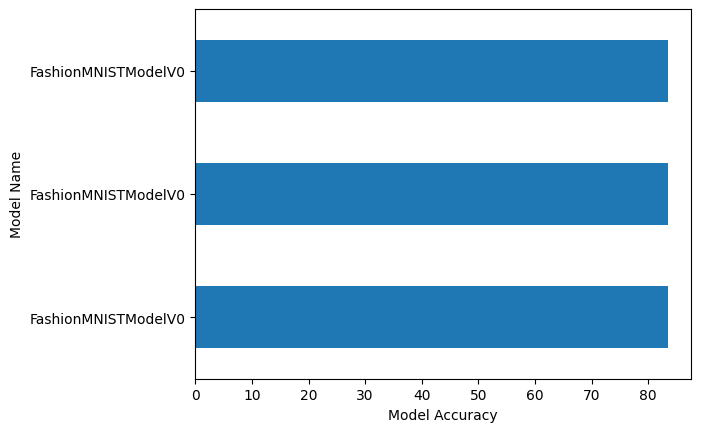

In [150]:
# Visulaize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Model Accuracy")
plt.ylabel("Model Name")

In [151]:
#Make and evaluate random predections with best model

def make_predections(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_pobs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Predection the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #Get the predection probablity (logits -> predection probablites)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #Get pred_prob off GPU for further calculation
      pred_pobs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_pobs)


In [152]:
import random
#random.seed(42)
test_samples = []
test_lables = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_lables.append(label)
#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'True label: Trouser')

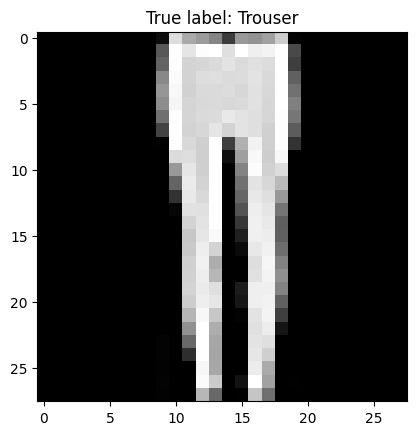

In [153]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"True label: {class_names[test_lables[0]]}")

In [154]:
# Make predections
pred_probs = make_predections(model=model_2,
                              data=test_samples)
pred_probs

tensor([[3.4342e-04, 9.9474e-01, 2.4080e-06, 4.7734e-03, 2.5976e-05, 1.7970e-05,
         8.3456e-05, 5.4985e-06, 2.8699e-06, 3.6503e-06],
        [2.2964e-03, 2.3547e-03, 8.8477e-03, 2.7865e-03, 1.2971e-01, 3.0583e-05,
         8.5285e-01, 2.9755e-06, 1.0608e-03, 6.2009e-05],
        [3.1549e-02, 8.3395e-01, 1.3467e-03, 6.8194e-02, 5.7570e-02, 4.2267e-05,
         7.0293e-03, 7.5489e-05, 2.2136e-04, 1.8846e-05],
        [2.2114e-01, 1.6501e-03, 1.1098e-01, 1.0735e-02, 2.9838e-03, 9.8077e-05,
         6.3717e-01, 1.0399e-04, 1.1474e-02, 3.6635e-03],
        [1.8430e-05, 6.3446e-07, 3.8788e-06, 1.6473e-05, 3.5091e-06, 2.0044e-02,
         2.8259e-04, 1.2392e-03, 5.0118e-03, 9.7338e-01],
        [2.4543e-04, 6.3246e-05, 5.1879e-02, 2.8586e-05, 9.0344e-01, 3.3742e-06,
         4.3666e-02, 9.0333e-06, 6.2365e-04, 4.4222e-05],
        [1.1084e-02, 1.7141e-03, 3.3518e-01, 4.3663e-03, 6.4782e-02, 4.0981e-05,
         5.8035e-01, 7.4188e-05, 2.1620e-03, 2.4462e-04],
        [5.5304e-02, 4.3751

In [155]:
#covert pred_probs to lables
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 6, 1, 6, 9, 4, 6, 8, 9])

Total time: 0.0855965019999303


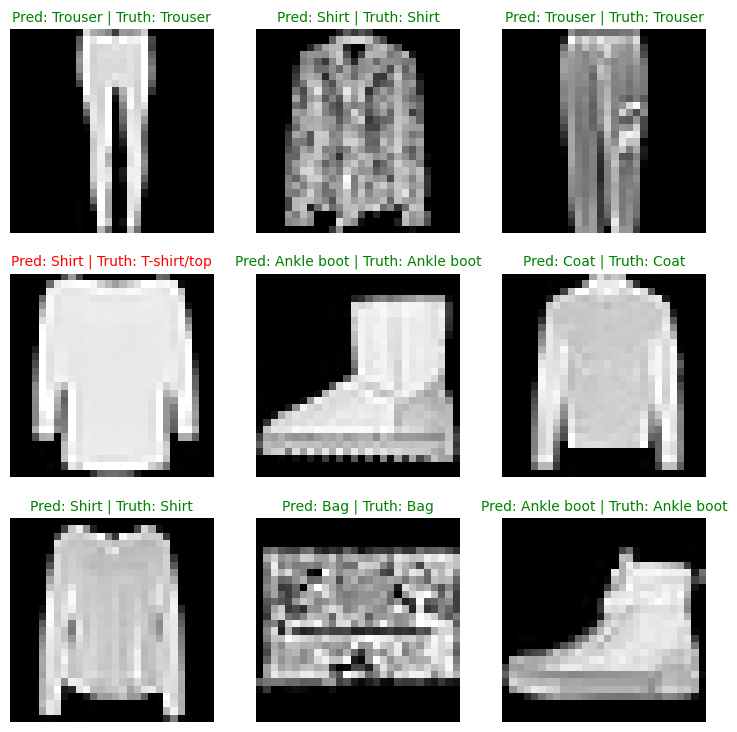

In [156]:
start = timer()
#Plot predections
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows, ncols, i+1)
  #Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")
  #Find the predection label in test form (eg : "class name: ankel boot")
  pred_label = class_names[pred_classes[i]]

  #Get the truth label (in text form)
  truth_label = class_names[test_lables[i]]

  #Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #Check for equality between pred and truth label and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, color="green")
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)
  end = timer()
print(f"Total time: {end-start}")

## 10 Making a confusion matrix for further predection evaluation

In [157]:
#Imort tqdm.auto
from tqdm.auto import tqdm

#Make predection s with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predections"):
    #send the data into target  device
    X, y = X.to(device), y.to(device)

    #Do th forwardpass
    y_logits = model_2(X)

    #Get the predection probablity
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    #Put predection on cpu for evAaluation
    y_preds.append(y_pred.cpu())

# Cocatenate list of predections into a tensor
#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

Making predections:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [158]:
len(y_preds_tensor)

10000

In [159]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.___version__.split(".")[1]) >= 19, "mlxtend version shold be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")

torchmetrics version: 1.8.2
mlxtend version: 0.24.0
torchmetrics version: 1.8.2


In [160]:
import mlxtend
print(mlxtend.__version__)

0.24.0


In [161]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

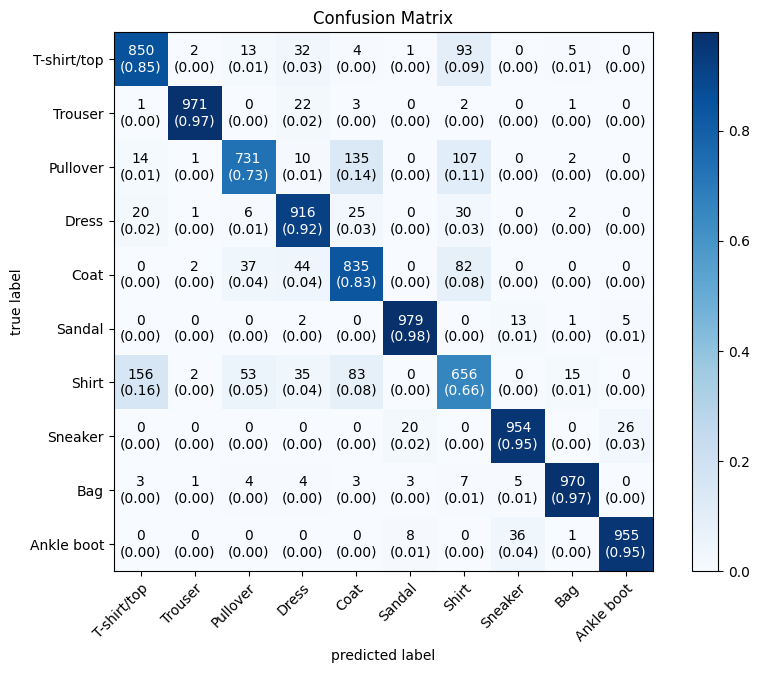

In [162]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2 Setup Confusion instance and compare predections to target
confmat = ConfusionMatrix(num_classes=len(class_names),
                        task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                        target=test_data.targets)
#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # Matplotlib working with numpy
                                colorbar=True,
                                show_normed=True,
                                class_names=class_names,
                                figsize=(10, 7))
plt.title("Confusion Matrix")
plt.show()

#11. Save and reload best performing model  

In [163]:
from pathlib import Path

#Create model  dictory path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save
MODEL_NAME = "03_pytorch_challenge_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



#Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),
            f=MODEL_SAVE_PATH)

Saving model to : model/03_pytorch_challenge_model.pth


In [164]:
confmat_tensor

tensor([[850,   2,  13,  32,   4,   1,  93,   0,   5,   0],
        [  1, 971,   0,  22,   3,   0,   2,   0,   1,   0],
        [ 14,   1, 731,  10, 135,   0, 107,   0,   2,   0],
        [ 20,   1,   6, 916,  25,   0,  30,   0,   2,   0],
        [  0,   2,  37,  44, 835,   0,  82,   0,   0,   0],
        [  0,   0,   0,   2,   0, 979,   0,  13,   1,   5],
        [156,   2,  53,  35,  83,   0, 656,   0,  15,   0],
        [  0,   0,   0,   0,   0,  20,   0, 954,   0,  26],
        [  3,   1,   4,   4,   3,   3,   7,   5, 970,   0],
        [  0,   0,   0,   0,   0,   8,   0,  36,   1, 955]])

In [165]:
#Create new insteance
torch.manual_seed(42)

load_model_2 = FashionMNISTModelV2(input_shapes=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

#Load in the save state_dict
load_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send model to target device
load_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifire): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [166]:
# Evaluate the loaded model
torch.manual_seed(42)

load_model_2_results = eval_model(model=load_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
load_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3229142725467682,
 'model_acc': 88.17891373801918}

In [167]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3229142725467682,
 'model_acc': 88.17891373801918}

In [168]:
#Check if model results are closs to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(load_model_2_results["model_loss"]),
              atol=0.001)

tensor(True)